# Ferramentas

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix

import pickle

# Árvores de decisão

# Base risco de crédito - Decision Tree

In [13]:
with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)

In [17]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [22]:
arvore_risco_credito.feature_importances_ # atributo que tem o maior ganho de informação

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

In [32]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

[Text(0.5, 0.9, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.2, 0.7, 'renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),
 Text(0.3, 0.5, 'historia <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.4, 0.3, 'divida <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = alto'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.8, 0.7, 'historia <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = baixo'),
 Text(0.7, 0.5, 'historia <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]\nclass = baixo'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = baixo'),
 Text

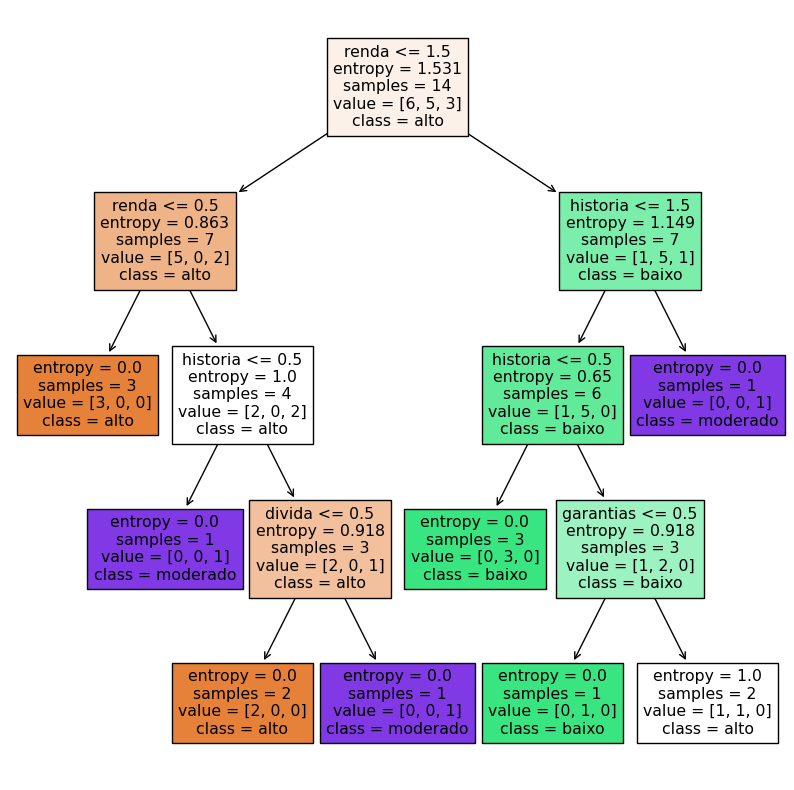

In [34]:
previsores = ['historia', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10, 10)) # aumentando a visualização
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=['alto', 'baixo', 'moderado'], filled=True)

In [37]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [38]:
# história boa, divida alta, garantias nenhuma, renda > 35
# historia ruim, divida alta, garantias adequada, renda < 15

# previsão de simulação. Quando um cliente chega no banco e fornece seus dados
"""
PREVISÃO 1

história = boa =(0)
dívida = alta =(0)
garantias = nenhuma =(1)
renda = > 35 =(2)


PREVISÃO 2

história = ruim =(2)
dívida = alta =(0)
garantias = adequada =(0)
renda = < 15 =(0)

"""

previsores = arvore_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsores

array(['baixo', 'alto'], dtype=object)

# Base Census - Decision Tree


In [2]:
with open('census_data.pkl', 'rb') as f:
    x_census_train, y_census_train, x_census_test, y_census_test = pickle.load(f);

In [3]:
x_census_train.shape, y_census_train.shape

((27676, 108), (27676,))

In [4]:
x_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [5]:
arvore_census = DecisionTreeClassifier(criterion='entropy')
arvore_census.fit(x_census_train, y_census_train)

DecisionTreeClassifier(criterion='entropy')

In [6]:
arvore_census.feature_importances_

array([8.00308558e-04, 4.57146101e-03, 5.58471821e-03, 0.00000000e+00,
       9.59318199e-03, 5.46443756e-03, 9.22133568e-03, 5.86522171e-03,
       0.00000000e+00, 1.25138147e-04, 1.88680084e-04, 9.08480993e-05,
       2.05740284e-04, 2.72071098e-04, 1.92575120e-04, 3.57057529e-04,
       1.87661287e-03, 2.81585520e-03, 2.69195339e-03, 3.89213004e-04,
       7.46081951e-04, 2.64538702e-03, 5.12648142e-04, 6.74929892e-04,
       4.23390270e-03, 2.18145128e-03, 1.53453378e-04, 1.93033085e-01,
       8.80646259e-04, 2.26867232e-03, 1.46966257e-03, 9.47066146e-04,
       2.01562566e-03, 7.25023234e-03, 0.00000000e+00, 5.62920716e-03,
       8.45722903e-03, 3.74744827e-03, 1.64165292e-03, 4.74514493e-03,
       4.84404935e-03, 6.36052751e-05, 7.68217823e-03, 3.92384018e-03,
       7.38860737e-03, 4.53563876e-03, 5.51916132e-03, 7.82350383e-04,
       2.91945915e-03, 8.46669408e-04, 8.87870059e-04, 1.24406899e-03,
       4.74915352e-03, 1.05200480e-03, 2.50438047e-03, 4.27120544e-03,
      

In [7]:
arvore_census.classes_

array([' <=50K', ' >50K'], dtype=object)

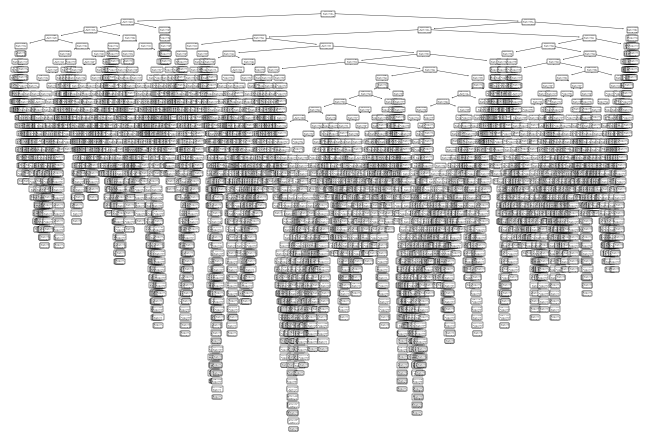

In [8]:
tree.plot_tree(arvore_census);

In [10]:
previsoes = arvore_census.predict(x_census_test)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [12]:
accuracy_score(y_census_test, previsoes)

0.8149437052200614

0.8149437052200614

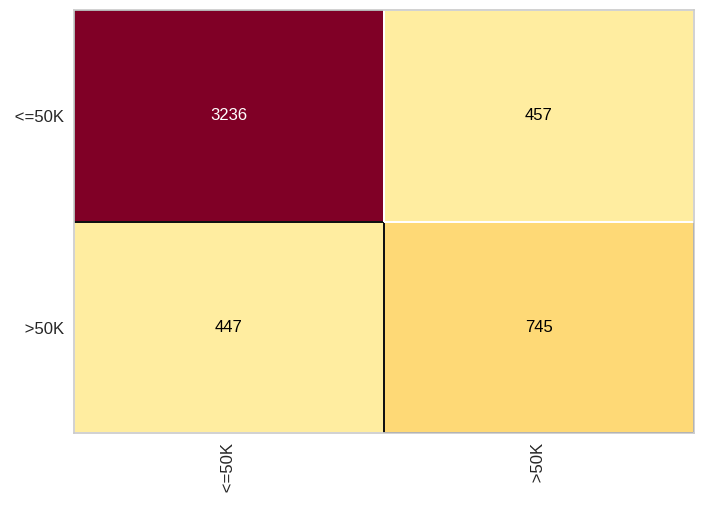

In [13]:
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_train, y_census_train)
cm.score(x_census_test, y_census_test)

In [16]:
print(classification_report(y_census_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      3693
        >50K       0.62      0.62      0.62      1192

    accuracy                           0.81      4885
   macro avg       0.75      0.75      0.75      4885
weighted avg       0.82      0.81      0.82      4885



# Base Credito

In [41]:
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [42]:
x_credit_treinamento.shape, x_credit_teste.shape, y_credit_treinamento.shape, y_credit_teste.shape

((1500, 3), (500, 3), (1500,), (500,))

In [43]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0) # tratando desordem / pureza
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
arvore_credit.feature_importances_ # atributo que possui o maior ganho de informação
# atributos -> income; age; loan

array([0.21528016, 0.3972593 , 0.38746054])

In [22]:
arvore_credit.classes_ # 0 = pagou, 1 = não pagou

array([0, 1])

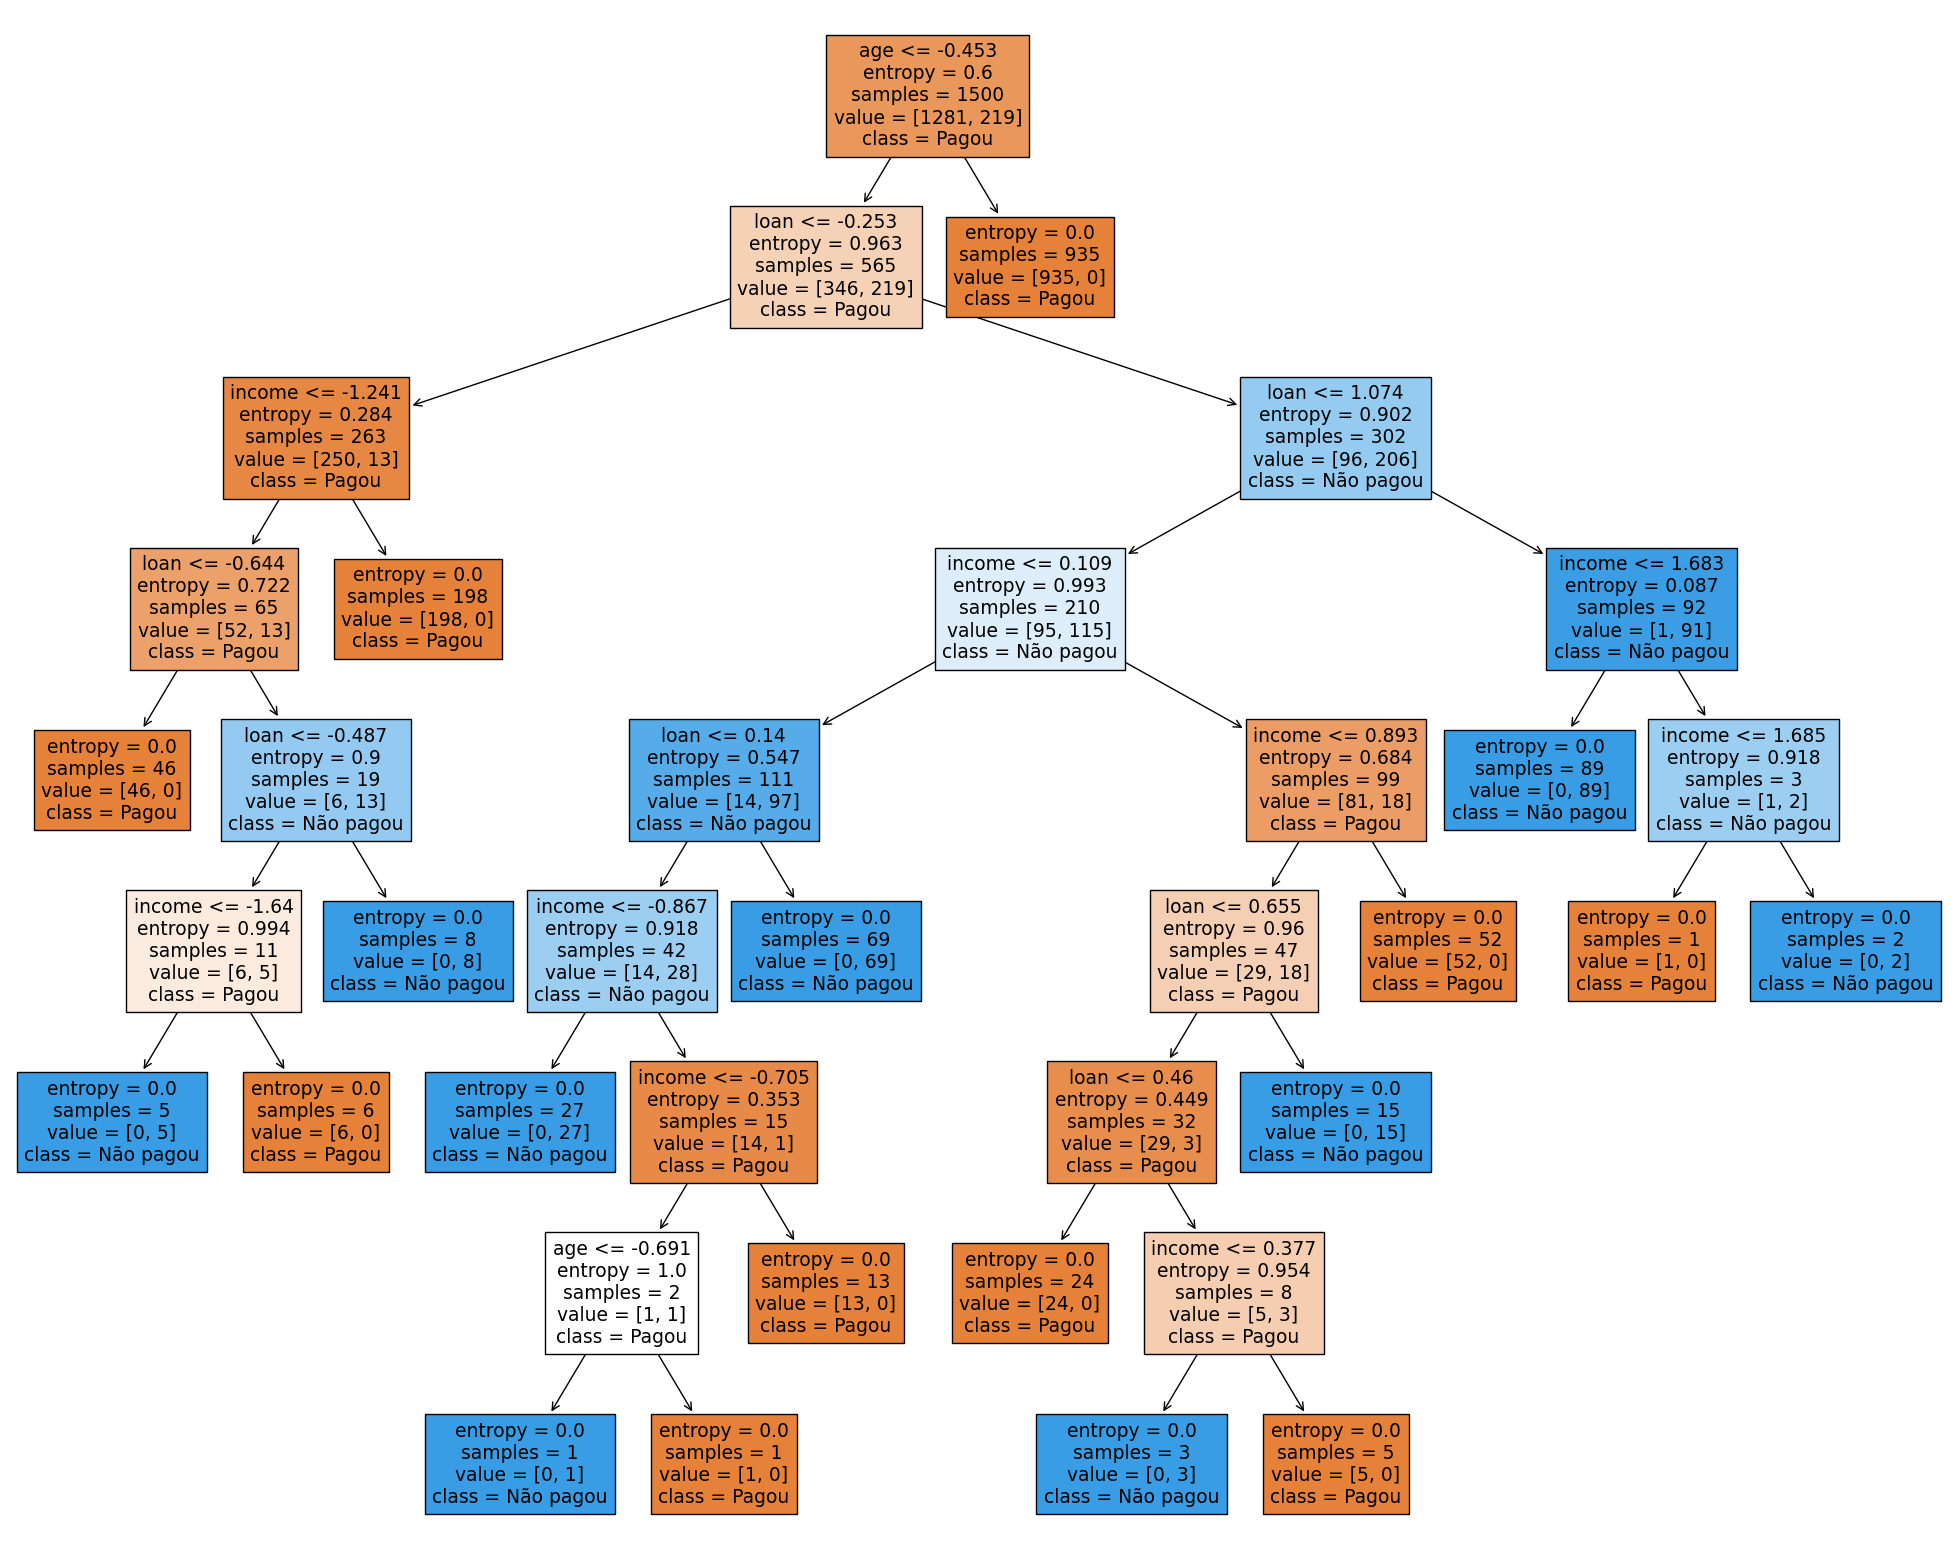

In [38]:
plt.subplots(nrows=1, ncols=1, figsize=(25, 20)) # preciso adionar antes de tree.plot para mesclar
variavel_previsores = ['income','age','loan']
tree.plot_tree(arvore_credit, feature_names=variavel_previsores, class_names=['Pagou', 'Não pagou'], filled=True); 

In [44]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
y_credit_teste # resposta

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

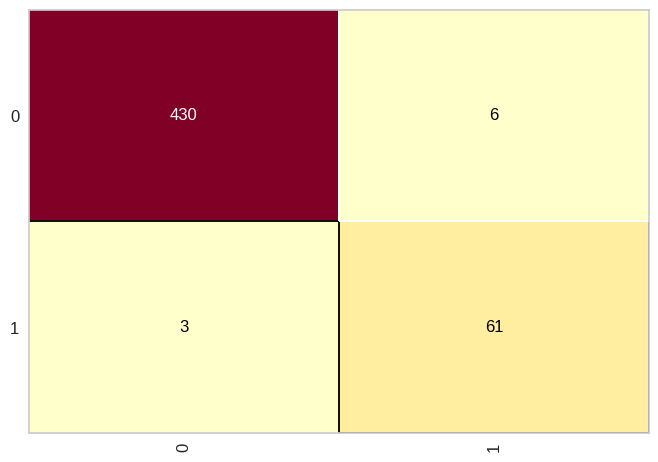

In [48]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [50]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



# Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier # coleção de varias árvores de decisão

## Base de credito

In [4]:
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f);

In [6]:
x_credit_treinamento.shape, x_credit_teste.shape

((1500, 3), (500, 3))

In [7]:
y_credit_treinamento.shape, y_credit_teste.shape

((1500,), (500,))

In [39]:
random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0) # n_estimators significa o numero de arvores
random_forest.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [40]:
previsores = random_forest.predict(x_credit_teste)

In [41]:
previsores[0:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
y_credit_teste[0:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
accuracy_score(y_credit_teste, previsores)

0.984

0.984

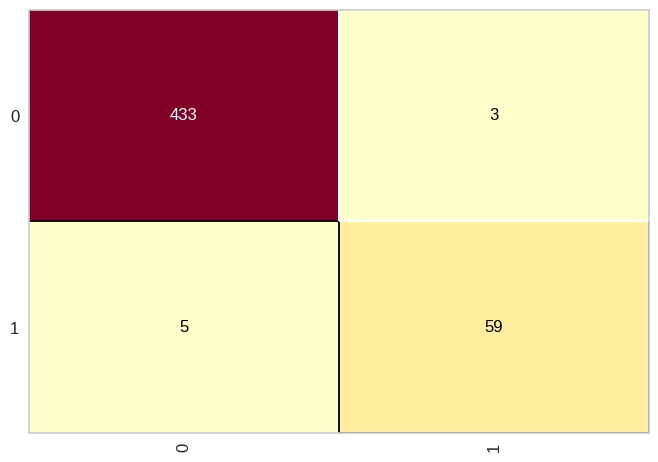

In [44]:
cm = ConfusionMatrix(random_forest)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [46]:
print(classification_report(y_credit_teste, previsores))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



# Base census

In [49]:
with open('census_data.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f);

In [50]:
x_census_treinamento.shape, x_census_teste.shape

((27676, 108), (4885, 108))

In [51]:
y_census_treinamento.shape, y_census_teste.shape

((27676,), (4885,))

In [65]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [66]:
previsores = random_forest.predict(x_census_teste)
previsores

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [67]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [68]:
accuracy_score(y_census_teste, previsores)

0.8507676560900717

In [69]:
print(classification_report(y_census_teste, previsores))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



0.8507676560900717

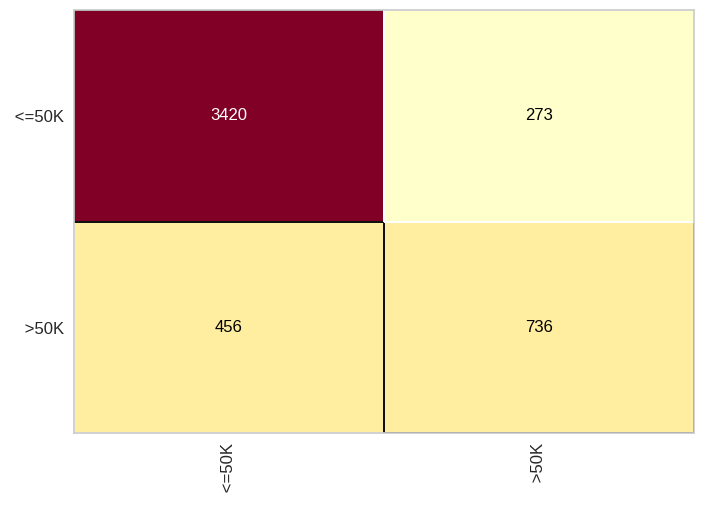

In [70]:
cm = ConfusionMatrix(random_forest)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)